In [1]:
import web3
import os
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
w3 = web3.Web3(web3.HTTPProvider(os.getenv("WEB3_PROVIDER")))

# check if connected
print(w3.isConnected())

True


In [3]:
!solc Voting.sol --abi -o build --overwrite

Compiler run successful. Artifact(s) can be found in directory "build".


In [ ]:
# load abi from abi file
with open("build/Voting.abi", "r") as abi_file:
    abi = abi_file.read()

# get the contract
contract = w3.eth.contract(address="0x86483c8390741112D875de02a911E4B0a8224285", abi=abi)

In [5]:
# get first decision
decision = contract.functions.decisions(1).call()
print("Decision:", decision)

Decision: ['test', '0x722b489F1d5afa914C71c003Bc350Ae6B5702278', 1657543326]


In [65]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import numpy as np


def Diagram(data):
    data.view()

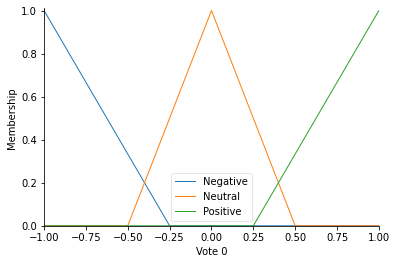

In [66]:
TOTAL_AGENTS = 3

# create fuzzy Votes input variables for the number of agents
votes = {}
for i in range(TOTAL_AGENTS):
    votes[i]  = ctrl.Antecedent(np.arange(-1, 1.25, 0.25), 'Vote ' + str(i))
    votes[i]['Negative'] = fuzz.trimf(votes[i].universe, [-1, -1, -0.25])
    votes[i]['Neutral'] = fuzz.trimf(votes[i].universe, [-0.5, 0, 0.5])
    votes[i]['Positive'] = fuzz.trimf(votes[i].universe, [0.25, 1, 1])
Diagram(votes[0])

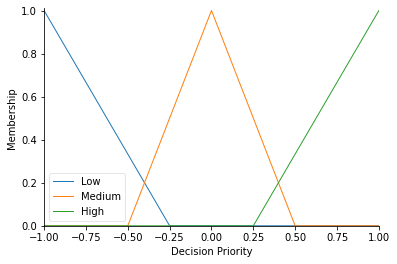

In [67]:
# output for decision priority
decision_priority = ctrl.Consequent(np.arange(-1, 1.25, 0.25), 'Decision Priority')
decision_priority['Low'] = fuzz.trimf(decision_priority.universe, [-1, -1, -0.25])
decision_priority['Medium'] = fuzz.trimf(decision_priority.universe, [-0.5, 0, 0.5])
decision_priority['High'] = fuzz.trimf(decision_priority.universe, [0.25, 1, 1])

Diagram(decision_priority)

In [75]:
# create fuzzy rule base for the decision priority
# first votes has higher impact on decision priority

# lower the vote number, the higher the impact
rules = []
rules.append(ctrl.Rule(votes[0]['Negative']  & votes[1]['Negative']  & votes[2]['Negative'],    decision_priority['Low']))
rules.append(ctrl.Rule(votes[0]['Negative']  & votes[1]['Negative']  & votes[2]['Neutral'],     decision_priority['Low']))
rules.append(ctrl.Rule(votes[0]['Negative']  & votes[1]['Negative']  & votes[2]['Positive'],    decision_priority['Low']))
rules.append(ctrl.Rule(votes[0]['Negative']  & votes[1]['Neutral']   & votes[2]['Negative'],    decision_priority['Low']))
rules.append(ctrl.Rule(votes[0]['Negative']  & votes[1]['Neutral']   & votes[2]['Neutral'],     decision_priority['Low']))
rules.append(ctrl.Rule(votes[0]['Negative']  & votes[1]['Neutral']   & votes[2]['Positive'],    decision_priority['Low']))
rules.append(ctrl.Rule(votes[0]['Negative']  & votes[1]['Positive']  & votes[2]['Negative'],    decision_priority['Low']))
rules.append(ctrl.Rule(votes[0]['Negative']  & votes[1]['Positive']  & votes[2]['Neutral'],     decision_priority['Low']))
rules.append(ctrl.Rule(votes[0]['Negative']  & votes[1]['Positive']  & votes[2]['Positive'],    decision_priority['Medium']))
rules.append(ctrl.Rule(votes[0]['Neutral']   & votes[1]['Negative']  & votes[2]['Negative'],    decision_priority['Low']))
rules.append(ctrl.Rule(votes[0]['Neutral']   & votes[1]['Negative']  & votes[2]['Neutral'],     decision_priority['Low']))
rules.append(ctrl.Rule(votes[0]['Neutral']   & votes[1]['Negative']  & votes[2]['Positive'],    decision_priority['Low']))
rules.append(ctrl.Rule(votes[0]['Neutral']   & votes[1]['Neutral']   & votes[2]['Negative'],    decision_priority['Medium']))
rules.append(ctrl.Rule(votes[0]['Neutral']   & votes[1]['Neutral']   & votes[2]['Neutral'],     decision_priority['Medium']))
rules.append(ctrl.Rule(votes[0]['Neutral']   & votes[1]['Neutral']   & votes[2]['Positive'],    decision_priority['Medium']))
rules.append(ctrl.Rule(votes[0]['Neutral']   & votes[1]['Positive']  & votes[2]['Negative'],    decision_priority['Medium']))
rules.append(ctrl.Rule(votes[0]['Neutral']   & votes[1]['Positive']  & votes[2]['Neutral'],     decision_priority['Medium']))
rules.append(ctrl.Rule(votes[0]['Neutral']   & votes[1]['Positive']  & votes[2]['Positive'],    decision_priority['High']))
rules.append(ctrl.Rule(votes[0]['Positive']  & votes[1]['Negative']  & votes[2]['Negative'],    decision_priority['Medium']))
rules.append(ctrl.Rule(votes[0]['Positive']  & votes[1]['Negative']  & votes[2]['Neutral'],     decision_priority['Medium']))
rules.append(ctrl.Rule(votes[0]['Positive']  & votes[1]['Negative']  & votes[2]['Positive'],    decision_priority['High']))
rules.append(ctrl.Rule(votes[0]['Positive']  & votes[1]['Neutral']   & votes[2]['Negative'],    decision_priority['Medium']))
rules.append(ctrl.Rule(votes[0]['Positive']  & votes[1]['Neutral']   & votes[2]['Neutral'],     decision_priority['Medium']))
rules.append(ctrl.Rule(votes[0]['Positive']  & votes[1]['Neutral']   & votes[2]['Positive'],    decision_priority['High']))
rules.append(ctrl.Rule(votes[0]['Positive']  & votes[1]['Positive']  & votes[2]['Negative'],    decision_priority['High']))
rules.append(ctrl.Rule(votes[0]['Positive']  & votes[1]['Positive']  & votes[2]['Neutral'],     decision_priority['High']))
rules.append(ctrl.Rule(votes[0]['Positive']  & votes[1]['Positive']  & votes[2]['Positive'],    decision_priority['High']))


# create fuzzy control system
decision_priority_ctrl = ctrl.ControlSystem(rules)
compute = ctrl.ControlSystemSimulation(decision_priority_ctrl)

# set input values
compute.input['Vote 0'] = 0.5
compute.input['Vote 1'] = 0.5
compute.input['Vote 2'] = 

# compute output
compute.compute()

# print output
print('Decision Priority: ' + str(compute.output['Decision Priority']))

Decision Priority: 0.6833333333333333
